In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
data_set = pd.read_csv(r"/content/Dataset_project.csv")


In [3]:
print(data_set.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0         NaN             360.0   
1              NaN             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

  Credit_History property_Area Loan_Status  
0            yes         Urban           Y  
1            yes         Rural           N  
2             No       

In [4]:
independent = data_set.iloc[:, 1:-1].values
dependent = data_set.iloc[:, -1].values

In [5]:
print('Independent:', independent[0:11])
print('Dependent: ', dependent[0:11])

Independent: [['Male' 'No' '0' 'Graduate' 'No' 5849.0 0.0 nan 360.0 'yes' 'Urban']
 ['Male' 'Yes' '1' 'Graduate' 'No' nan 1508.0 128.0 360.0 'yes' 'Rural']
 ['Male' 'Yes' '0' 'Graduate' 'Yes' 3000.0 0.0 66.0 360.0 'No' 'Urban']
 ['Male' 'Yes' '0' 'Not Graduate' 'No' 2583.0 2358.0 120.0 360.0 'yes'
  'Urban']
 ['Male' 'No' '0' 'Graduate' 'No' 6000.0 0.0 141.0 360.0 'yes' 'Urban']
 [nan 'Yes' '2' 'Graduate' 'Yes' 5417.0 4196.0 267.0 360.0 'yes' 'Urban']
 ['Male' 'Yes' '0' 'Not Graduate' 'No' 2333.0 1516.0 95.0 360.0 'yes'
  'Urban']
 ['Male' 'Yes' '3+' 'Graduate' 'No' 3036.0 2504.0 158.0 360.0 'No'
  'Semiurban']
 ['Male' 'Yes' '2' nan 'No' 4006.0 1526.0 168.0 360.0 'yes' 'Urban']
 ['Male' 'Yes' '1' 'Graduate' 'No' 12841.0 10968.0 349.0 360.0 'yes'
  'Semiurban']
 ['Male' 'Yes' '2' 'Graduate' 'No' 3200.0 700.0 70.0 360.0 'yes' 'Urban']]
Dependent:  ['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y']


In [6]:
print(data_set.isna().any(axis=0))
print(data_set.dtypes)



Loan_ID              False
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome       True
CoapplicantIncome     True
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
property_Area        False
Loan_Status          False
dtype: bool
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
property_Area         object
Loan_Status           object
dtype: object


In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(independent[:, 5:9])
independent[:, 5:9] = imputer.transform(independent[:, 5:9])

In [8]:
independent = pd.DataFrame(independent)
columns = independent.columns
for column in columns:
    if independent[column].dtype == 'object':
        independent[column] = independent[column].infer_objects()
        independent[column] = independent[column].fillna(independent[column].mode()[0])

In [9]:
print(independent.isna().any(axis=0))
independent = independent.values
print("Example of Handle: ", independent[11])


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool
Example of Handle:  ['Male' 'Yes' '2' 'Graduate' 'No' 2500.0 1620.8889396225773 109.0 360.0
 'yes' 'Urban']


In [10]:
# Encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [0, 1, 2, 3, 4, 9, 10])], remainder='passthrough')
independent = np.array(ct.fit_transform(independent))
data_encoded = pd.DataFrame(independent)
print(data_encoded.head(12))
print(data_encoded.iloc[0:20, 0:17])

     0    1    2    3    4    5    6    7    8    9   ...   11   12   13   14  \
0   0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   
1   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  1.0   
2   0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0  0.0  0.0   
3   0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0   
4   0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   
5   0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0  1.0  0.0   
6   0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0  0.0   
7   0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  1.0  0.0  0.0   
8   0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   
9   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   
10  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   
11  0.0  1.0  0.0  1.0  0.0 

In [11]:
le = LabelEncoder()
dependent = le.fit_transform(dependent)
target = pd.DataFrame(dependent)
print("target",target.head(21))
print("Ex of encoder: ", dependent[0:11])

target     0
0   1
1   0
2   1
3   1
4   1
5   1
6   1
7   0
8   1
9   0
10  1
11  1
12  1
13  0
14  1
15  1
16  1
17  0
18  0
19  1
20  0
Ex of encoder:  [1 0 1 1 1 1 1 0 1 0 1]


In [12]:
# Split data into test and train sets
independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent, dependent, test_size=0.2, random_state=1)
print('independent_train', independent_train[0:15])
print('independent_test', independent_test[0:15])
print('dependent_train', dependent_train[0:15])
print('dependent_test', dependent_test[0:15])

independent_train [[0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0
  4400.0 0.0 127.0 360.0]
 [0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
  3583.0 0.0 96.0 360.0]
 [1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
  4333.0 2451.0 110.0 360.0]
 [1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0
  2900.0 0.0 71.0 360.0]
 [1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0
  4300.0 0.0 136.0 360.0]
 [0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
  3600.0 0.0 80.0 360.0]
 [0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0
  5417.0 4196.0 267.0 360.0]
 [1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0
  8624.0 0.0 150.0 360.0]
 [0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0
  2483.0 2466.0 90.0 180.0]
 [0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
  4166.0 7210.0 184.0 360.0]
 [1.0 0.0 0.0 

In [13]:
# Standardization
sc = StandardScaler()
independent_train[:, 5:9] = sc.fit_transform(independent_train[:, 5:9])
independent_test[:, 5:9] = sc.transform(independent_test[:, 5:9])
print("independent_train standardization", independent_train[0:10, 5:9])
print("independent_test standardization", independent_test[0:10, 5:9])

independent_train standardization [[-0.4640544522504497 2.2171293716430673 -0.30184617127124785
  0.5088952337901783]
 [-0.4640544522504497 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]
 [-0.4640544522504497 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]
 [-0.4640544522504497 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]
 [-0.4640544522504497 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]
 [-0.4640544522504497 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]
 [-0.4640544522504497 2.2171293716430673 -0.30184617127124785
  0.5088952337901783]
 [2.1549195253928928 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]
 [-0.4640544522504497 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]
 [-0.4640544522504497 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]]
independent_test standardization [[2.1549195253928928 -0.4510336711920946 -0.30184617127124785
  0.5088952337901783]
 

class_Yes: 422
class_No: 192
Proportion: 2.2 :1


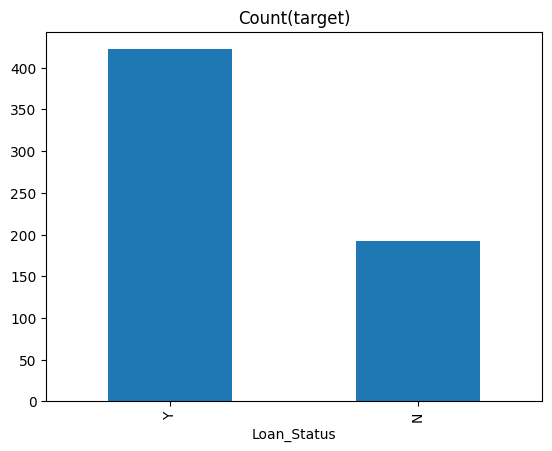

In [14]:
# Visualization of imbalance or balance
target_count = data_set.Loan_Status.value_counts()
print('class_Yes:', target_count.iloc[0])
print('class_No:', target_count.iloc[1])
print('Proportion:', round(target_count.iloc[0] / target_count.iloc[1], 2), ':1')
target_count.plot(kind='bar', title='Count(target)')
plt.show()

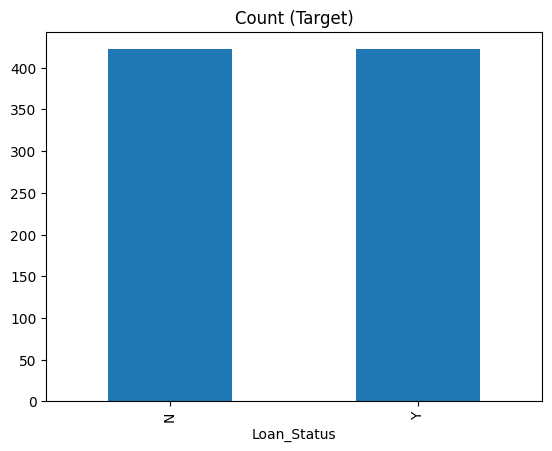

In [15]:
# Handle imbalance
count_class_yes, count_class_no = data_set['Loan_Status'].value_counts()
df_class_yes = data_set[data_set['Loan_Status'] == 'Y']
df_class_no = data_set[data_set['Loan_Status'] == 'N']
df_class_no_upsampled = resample(df_class_no, replace=True, n_samples=count_class_yes, random_state=42)
df_upsampled = pd.concat([df_class_no_upsampled, df_class_yes])
df_upsampled['Loan_Status'].value_counts().plot(kind='bar', title='Count (Target)')
plt.show()

In [18]:
#knn model
key=math.ceil((math.sqrt(len(dependent_test)))-1)
model=KNeighborsClassifier(n_neighbors=key)
model.fit(independent_train, dependent_train)
dependent_pred= model.predict(independent_test)
print("Accuracy:", accuracy_score(dependent_test,dependent_pred))
print("Confusion Matrix:\n", confusion_matrix(dependent_test,dependent_pred))
print("Classification Report:\n", classification_report(dependent_test, dependent_pred))
cm=confusion_matrix(dependent_test, dependent_pred)

Accuracy: 0.6504065040650406
Confusion Matrix:
 [[ 5 34]
 [ 9 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.13      0.19        39
           1       0.69      0.89      0.78        84

    accuracy                           0.65       123
   macro avg       0.52      0.51      0.48       123
weighted avg       0.58      0.65      0.59       123



In [19]:
# Naive Bayes model
model = GaussianNB()
model.fit(independent_train, dependent_train)
dependent_pred = model.predict(independent_test)
print("Confusion Matrix:\n", confusion_matrix(dependent_test, dependent_pred))
print("Accuracy:", accuracy_score(dependent_test, dependent_pred))
cm = confusion_matrix(dependent_test, dependent_pred)
print("\nClassification Report:")
print(classification_report(dependent_test, dependent_pred))

Confusion Matrix:
 [[18 21]
 [ 3 81]]
Accuracy: 0.8048780487804879

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        39
           1       0.79      0.96      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



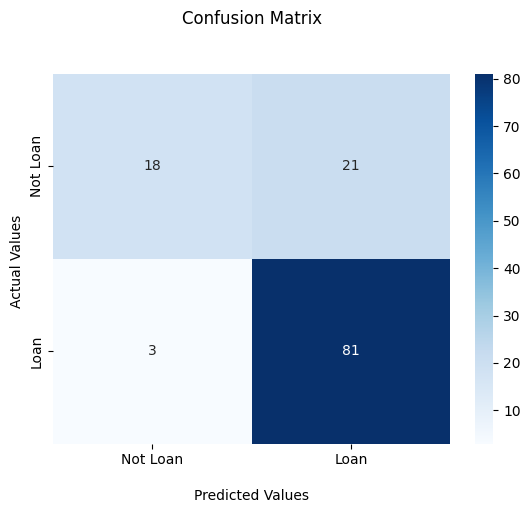

In [20]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix' + '\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['Not Loan', 'Loan'])
ax.yaxis.set_ticklabels(['Not Loan', 'Loan'])
plt.show()

In [21]:
# Results Table
results = pd.DataFrame({
    "Actual Values": dependent_test,
    "Predicted Values": dependent_pred
})
results["Correct"] = results["Actual Values"] == results["Predicted Values"]
print("\nResults Table:")
print(results)


Results Table:
     Actual Values  Predicted Values  Correct
0                0                 1    False
1                1                 1     True
2                1                 1     True
3                0                 1    False
4                1                 1     True
..             ...               ...      ...
118              0                 1    False
119              0                 1    False
120              1                 1     True
121              0                 0     True
122              1                 1     True

[123 rows x 3 columns]


In [ ]:
# Allow user input for prediction
sample_input = input("Enter a sample (comma-separated values matching the independent feature format): ")
sample_input = np.array(sample_input.split(","), dtype=object).reshape(1, -1)

In [ ]:
# Process the sample (encoding and standardizing)
sample_input_encoded = np.array(ct.transform(sample_input))
sample_input_encoded[:, 5:9] = sc.transform(sample_input_encoded[:, 5:9])

In [ ]:
# Predict using the model
sample_prediction = model.predict(sample_input_encoded)
predicted_label = le.inverse_transform(sample_prediction)
print("Prediction for the input sample:", predicted_label[0])